In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_store = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\stores.csv")
df_store.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_22128\4200195265.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_store = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\stores.csv")


,store_area,items_available,daily_cust_count,store_sales,city,recommended
0,2157,1961,530,66490,Vancouver,0
1,1928,2278,210,39820,Surrey,0
2,2090,1609,936,70213,Burnaby,1
3,2942,1923,744,59103,Vancouver,0
4,3037,2111,450,46620,Surrey,0


In [3]:
df_store_test = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\stores_test.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_22128\1690014993.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_store_test = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\stores_test.csv")


In [4]:
# recommended is the target column
numerical_cols = df_store.drop('recommended', axis = 1).select_dtypes('number').columns
numerical_cols

Index(['store_area', 'items_available', 'daily_cust_count', 'store_sales'], dtype='object')

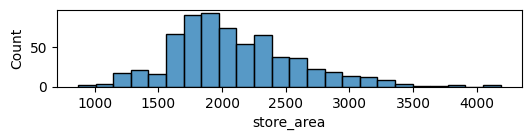

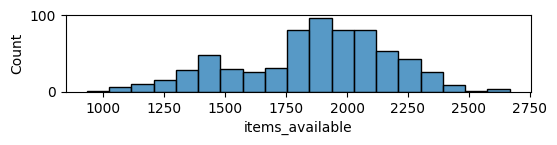

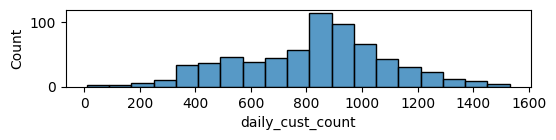

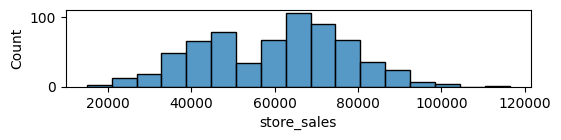

In [5]:
for feature in numerical_cols:
    fig, (ax) = plt.subplots(1,1,figsize=(6,1))
    sns.histplot(df_store[feature], ax = ax)
    plt.show()

In [6]:
df_store.describe()

,store_area,items_available,daily_cust_count,store_sales,recommended
count,664.000000,664.000000,664.000000,664.000000,664.000000
mean,2095.987952,1860.156627,818.875000,60367.125000,0.323795
std,501.502809,310.416296,265.931105,17084.923008,0.468276
min,869.000000,932.000000,10.000000,14920.000000,0.000000
25%,1755.500000,1670.000000,627.500000,46050.000000,0.000000
50%,2007.000000,1900.500000,850.000000,62895.000000,0.000000
75%,2362.000000,2072.250000,988.000000,72415.000000,1.000000
max,4186.000000,2667.000000,1530.000000,116320.000000,1.000000


In [7]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

df_minmax = df_store.copy()
df_minmax[numerical_cols] = minmax.fit_transform(df_minmax[numerical_cols])
df_minmax

,store_area,items_available,daily_cust_count,store_sales,city,recommended
0,0.388303,0.593084,0.342105,0.508580,Vancouver,0
1,0.319264,0.775793,0.131579,0.245562,Surrey,0
2,0.368104,0.390202,0.609211,0.545296,Burnaby,1
3,0.624962,0.571182,0.482895,0.435730,Vancouver,0
4,0.653603,0.679539,0.289474,0.312623,Surrey,0
...,...,...,...,...,...,...
659,0.226108,0.250144,0.875000,0.473570,Langley,0
660,0.391317,0.627089,0.638158,0.504438,Vancouver,1
661,0.305999,0.553314,0.407895,0.278797,Surrey,0
662,0.103105,0.296830,0.723684,0.254536,Langley,0


In [8]:
# Apply the fitted scalar to the test data
df_test_minmax = df_store_test.copy()
df_test_minmax[numerical_cols] = minmax.transform(df_test_minmax[numerical_cols])
df_test_minmax

,store_area,items_available,daily_cust_count,store_sales,city,recommended
0,0.575822,0.679539,0.375000,0.786686,Surrey,1
1,0.355743,0.211527,0.684211,0.290730,Vancouver,0
2,0.248116,0.730836,0.617105,0.580671,Burnaby,1
3,0.432318,0.680115,0.427632,0.221598,Surrey,0
4,0.240277,0.199424,0.282895,0.485207,Vancouver,0
...,...,...,...,...,...,...
228,0.281580,0.517003,0.552632,0.662327,Burnaby,1
229,0.255351,0.290490,0.690789,0.606706,Langley,0
230,0.255050,0.541787,0.601316,0.805621,Burnaby,1
231,0.290323,0.286455,0.723684,0.388757,Burnaby,0


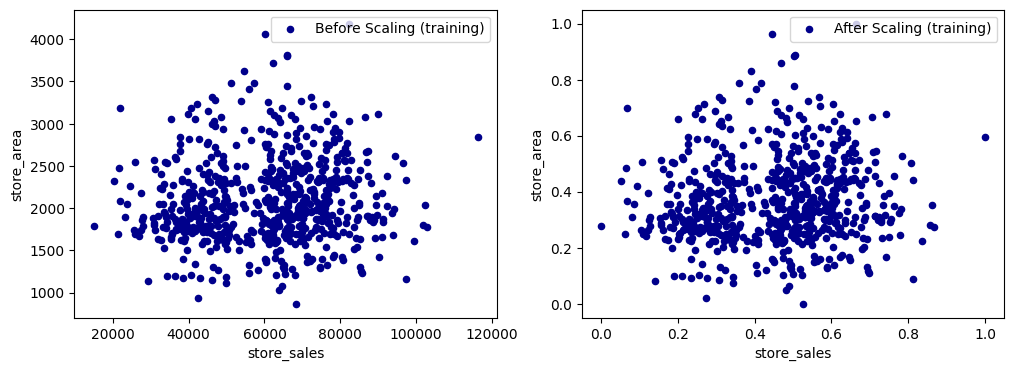

In [9]:
# Now make plots for both of the datas
fig, (before, after) = plt.subplots(1,2,figsize=(12,4))
before = df_store.plot.scatter(ax = before, x = 'store_sales', y = 'store_area', label = 'Before Scaling (training)', color = 'darkblue')
after = df_minmax.plot.scatter(ax = after, x = 'store_sales', y = 'store_area', label = 'After Scaling (training)', color = 'darkblue')

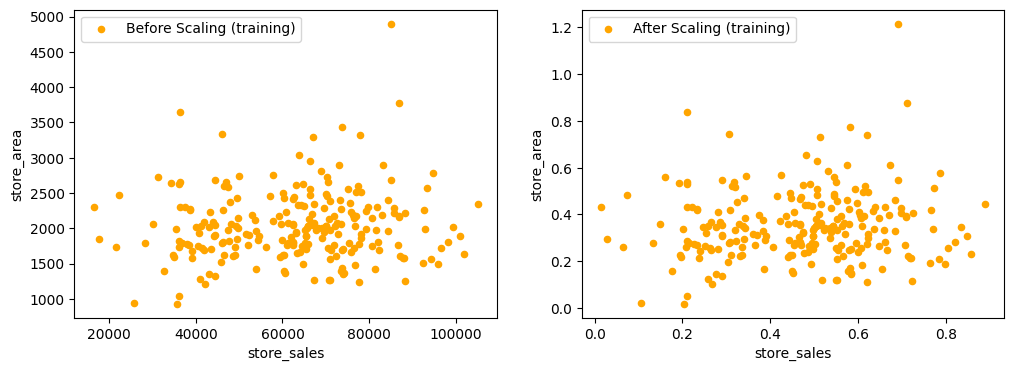

In [14]:
# Now make plots for both of the datas
fig, (before, after) = plt.subplots(1,2,figsize=(12,4))
before = df_store_test.plot.scatter(ax = before, x = 'store_sales', y = 'store_area', label = 'Before Scaling (training)', color = 'orange')
after = df_test_minmax.plot.scatter(ax = after, x = 'store_sales', y = 'store_area', label = 'After Scaling (training)', color = 'orange')

## Using Standard Scaler

In [15]:
df_stores_norm = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\stores_norm_dist.csv")
df_stores_norm_test = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\stores_norm_dist_test.csv")


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_22128\4177653945.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_stores_norm = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\stores_norm_dist.csv")
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_22128\4177653945.py:2: SyntaxWarning: invalid escape sequence '\C'
  df_stores_norm_test = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\stores_norm_dist_test.csv")


In [17]:
# Get the numerical columns
numerical_cols = df_stores_norm.drop('recommended', axis = 1).select_dtypes('number').columns

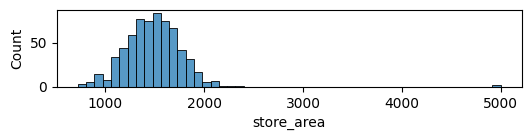

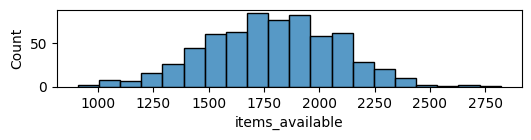

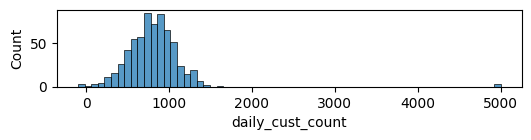

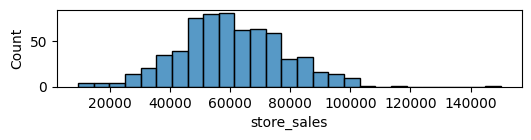

In [18]:
for feature in numerical_cols:
    fig, (ax) = plt.subplots(1,1,figsize=(6,1))
    sns.histplot(df_stores_norm[feature], ax = ax)
    plt.show()

In [24]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

df_stdscale = df_stores_norm.copy()
df_stdscale[numerical_cols] = std.fit_transform(df_stdscale[numerical_cols])
df_stdscale.describe() # The mean is as close to zero as possible

,store_area,items_available,daily_cust_count,store_sales,recommended
count,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,648.000000
mean,-5.126215e-16,3.303256e-16,-3.563679e-17,1.151342e-16,0.279321
std,1.000772e+00,1.000772e+00,1.000772e+00,1.000772e+00,0.449012
min,-2.372331e+00,-2.956288e+00,-2.361091e+00,-2.877187e+00,0.000000
25%,-5.945928e-01,-6.876234e-01,-4.941783e-01,-6.350262e-01,0.000000
50%,-1.163678e-02,6.824269e-03,-4.348422e-02,-6.691888e-02,0.000000
75%,5.390790e-01,7.058552e-01,4.092800e-01,6.762417e-01,1.000000
max,1.083739e+01,3.468364e+00,1.086930e+01,5.092928e+00,1.000000


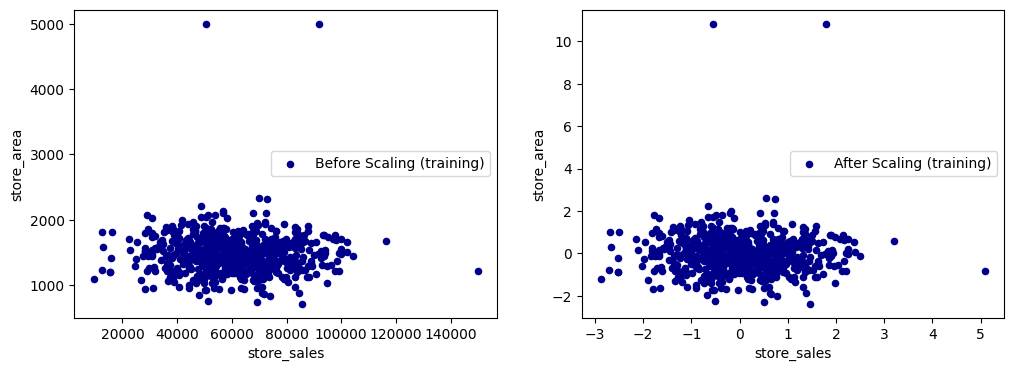

In [25]:
# Now make plots for both of the datas
fig, (before, after) = plt.subplots(1,2,figsize=(12,4))
before = df_stores_norm.plot.scatter(ax = before, x = 'store_sales', y = 'store_area', label = 'Before Scaling (training)', color = 'darkblue')
after = df_stdscale.plot.scatter(ax = after, x = 'store_sales', y = 'store_area', label = 'After Scaling (training)', color = 'darkblue')

In [27]:
df_stdscale_test = df_stores_norm_test.copy()
df_stdscale_test[numerical_cols] = std.fit_transform(df_stdscale_test[numerical_cols])
df_stdscale_test.describe()

,store_area,items_available,daily_cust_count,store_sales,recommended
count,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02,248.000000
mean,1.432546e-17,3.581365e-17,-1.181850e-16,6.016693e-16,0.213710
std,1.002022e+00,1.002022e+00,1.002022e+00,1.002022e+00,0.410753
min,-1.250333e+00,-2.122146e+00,-2.638915e+00,-2.621255e+00,0.000000
25%,-4.481349e-01,-5.111589e-01,-6.807004e-01,-6.727384e-01,0.000000
50%,-7.382004e-02,-1.212767e-01,2.516063e-02,-4.190501e-02,0.000000
75%,2.468547e-01,3.017413e-01,7.651414e-01,5.447452e-01,0.000000
max,6.238481e+00,6.143322e+00,2.567047e+00,4.849408e+00,1.000000


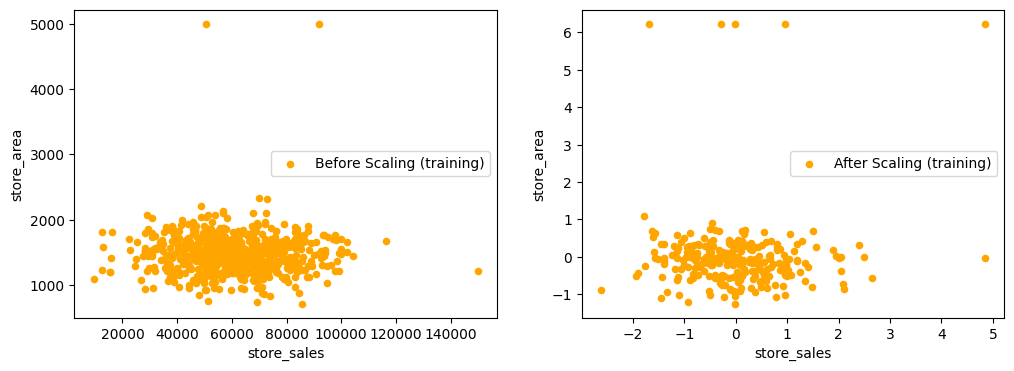

In [29]:
# Now make plots for both of the datas
fig, (before, after) = plt.subplots(1,2,figsize=(12,4))
before = df_stores_norm.plot.scatter(ax = before, x = 'store_sales', y = 'store_area', label = 'Before Scaling (training)', color = 'orange')
after = df_stdscale_test.plot.scatter(ax = after, x = 'store_sales', y = 'store_area', label = 'After Scaling (training)', color = 'orange')

### Exercise

In [31]:
df_cx = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\cx_survey_data.csv")
df_cx_test = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\cx_survey_data_test.csv")
df_cx.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_22128\3301390935.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_cx = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\cx_survey_data.csv")
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_22128\3301390935.py:2: SyntaxWarning: invalid escape sequence '\C'
  df_cx_test = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\cx_survey_data_test.csv")


,caseid,date,inquiry,wait_time,case_duration,sat_score,solved
0,1,2021-11-28,Bug,680,3129,2,0
1,2,2021-12-03,Bug,745,246,6,1
2,3,2021-12-20,Bug,1199,2686,1,0
3,4,2021-10-02,Bug,205,591,4,1
4,5,2021-11-20,Bug,24,2327,2,0


In [32]:
scales_cols = df_cx.drop(['solved', 'caseid'], axis = 1).select_dtypes('number').columns

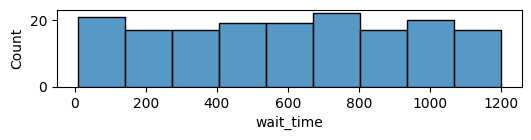

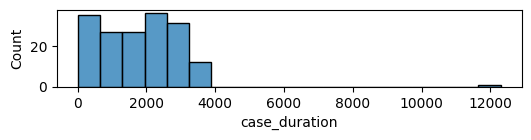

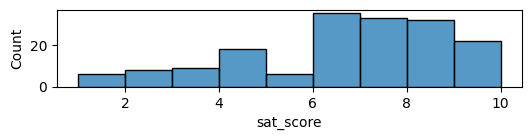

In [34]:
for feature in scales_cols:
    fig, (ax) = plt.subplots(1,1,figsize=(6,1))
    sns.histplot(df_cx[feature], ax = ax)
    plt.show()

In [43]:
df_cx_scaled = df_cx.copy()
df_cx_scaled[scales_cols] = minmax.fit_transform(df_cx_scaled[scales_cols])
df_cx_scaled.head()

,caseid,date,inquiry,wait_time,case_duration,sat_score,solved
0,1,2021-11-28,Bug,0.563866,0.254026,0.111111,0
1,2,2021-12-03,Bug,0.618487,0.019522,0.555556,1
2,3,2021-12-20,Bug,1.000000,0.217993,0.000000,0
3,4,2021-10-02,Bug,0.164706,0.047584,0.333333,1
4,5,2021-11-20,Bug,0.012605,0.188791,0.111111,0


In [44]:
# Use it on testing data
df_cx_test_scaled = df_cx_test.copy()
df_cx_test_scaled[scales_cols] = minmax.transform(df_cx_test_scaled[scales_cols])
df_cx_test_scaled.head()

,caseid,date,inquiry,wait_time,case_duration,sat_score,solved
0,170,2021-10-31,Discovery,0.396639,0.030909,0.444444,1
1,171,2021-09-16,Discovery,0.192437,0.237352,0.888889,1
2,172,2021-11-11,Discovery,0.931933,0.047422,0.555556,1
3,173,2021-11-16,Discovery,0.268067,0.056857,0.888889,1
4,174,2021-09-13,Discovery,0.159664,0.230926,0.555556,1


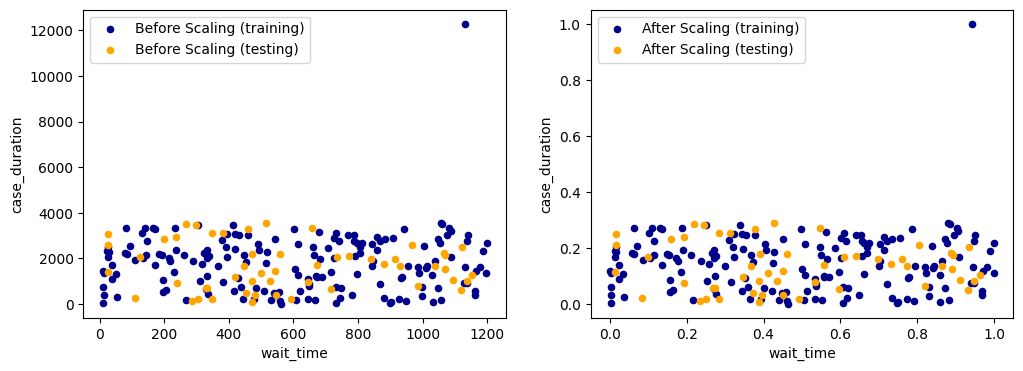

In [50]:
# Now make plots for both of the datas
fig, (before, after) = plt.subplots(1,2,figsize=(12,4))
before = df_cx.plot.scatter(ax = before, x = 'wait_time', y = 'case_duration', label = 'Before Scaling (training)', color = 'darkblue')
after = df_cx_scaled.plot.scatter(ax = after, x = 'wait_time', y = 'case_duration', label = 'After Scaling (training)', color = 'darkblue')

before = df_cx_test.plot.scatter(ax = before, x = 'wait_time', y = 'case_duration', label = 'Before Scaling (testing)', color = 'orange')
after = df_cx_test_scaled.plot.scatter(ax = after, x = 'wait_time', y = 'case_duration', label = 'After Scaling (testing)', color = 'orange')